In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import ISLP as islp
from ISLP.models import ModelSpec as MS
from ISLP.models import summarize
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
#Loading data

df_train = pd.read_csv("Data/evaluations_train.csv")
df_test = pd.read_csv("Data/evaluations_test.csv")

In [8]:
#changing gender to categorical variable
catvars = [
    "gender"
]

for catvar in catvars:
    df_train[catvar] = df_train[catvar].astype("category")
    df_test[catvar] = df_test[catvar].astype("category")


# List of predictors
predictors = [
    "bty_avg",
    "gender"
]

# response variable
response = "score"

# store the predictor and response
X_train = df_train[predictors]
y_train = df_train[response]
X_test = df_test[predictors]
y_test = df_test[response]


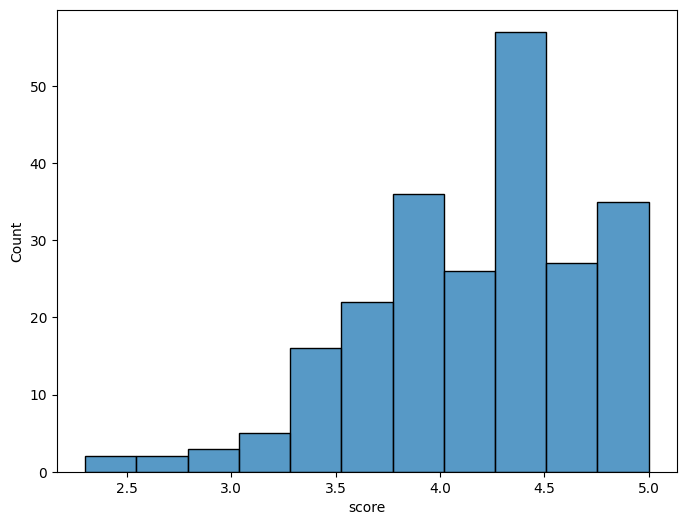

In [19]:
# Visualising the distribution of the 'Score' variable

fig, ax = plt.subplots(figsize = (8,6))
ax = sns.histplot(
    x = y_train,
    
)
plt.show()

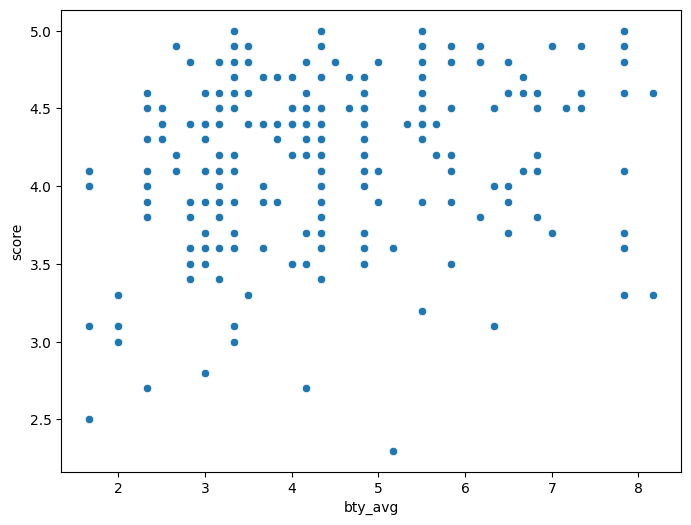

In [ ]:
# uncovering the relationship between predictor and response variables

fig, ax = plt.subplots(figsize = (8,6))
ax = sns.scatterplot(
    x = X_train['bty_avg'],
    y = y_train
)

ax.set_xlabel('bty_avg')
ax.set_ylabel('score')
plt.show()

#There seems to be no strong relationship between perceived beauty and teaching evaluations. 

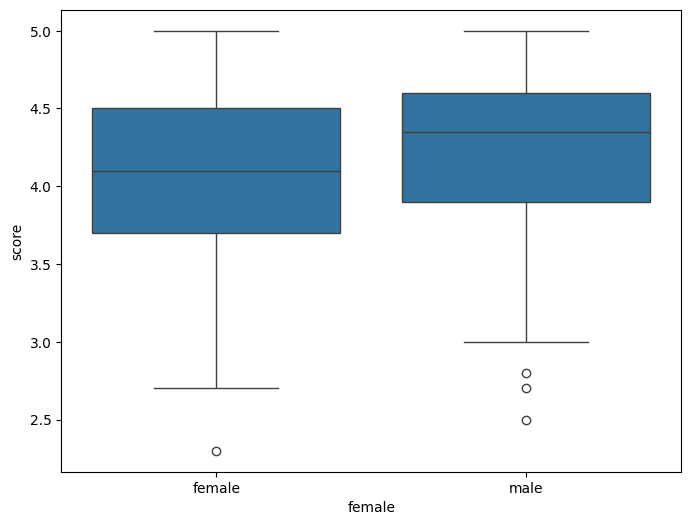

In [27]:
# examining the relationship between gender and evaluations

fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(
    x = X_train['gender'],
    y = y_train
)
ax.set_xlabel("female")
ax.set_ylabel("score")

plt.show()



Observations
1. The scatterplot looks fairly cloud-like, with not strong visible trends. There might be a slighlty upward pattern, suggesting higher beauty scores might faintly lead to better evals. 
2. Gender does not appear to have a large effect on teaching evaluations. On average, both male and female instructors receive similar scores.

In [31]:
# Performing simple linear regression with score as the response and bty_avg as the predictor. 

# Train the model
design = MS(["bty_avg"])
X_train_design = design.fit_transform(X_train)
model = sm.OLS(y_train, X_train_design)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     11.53
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           0.000809
Time:                        21:53:53   Log-Likelihood:                -176.13
No. Observations:                 231   AIC:                             356.3
Df Residuals:                     229   BIC:                             363.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8464      0.104     36.996      0.0

There is a small but statistically significant positive relationship between instructor beauty and teaching evaluation scores. However, beauty alone explains less than 5% of the differences in scores, suggesting that other factors (like teaching skill, clarity, or personality) are much more important in determining evaluations.

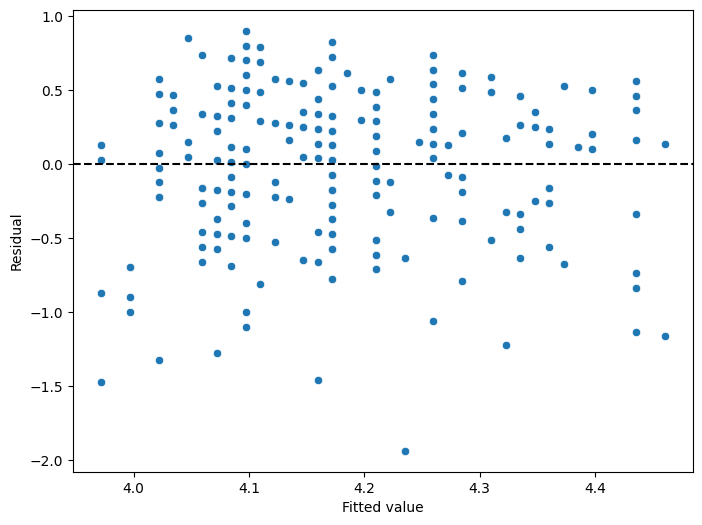

In [32]:
# Visual representation of the residuals

fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.scatterplot(
    x = results.fittedvalues,
    y = results.resid
)

ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")
plt.show()

In [33]:
# performing multiple linear regression with score as the response and gender and bty_avg as predictors.

design = MS(['gender', 'bty_avg'])
X_train_design = design.fit_transform(X_train)
model = sm.OLS(y_train, X_train_design)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     9.276
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           0.000134
Time:                        22:02:37   Log-Likelihood:                -172.77
No. Observations:                 231   AIC:                             351.5
Df Residuals:                     228   BIC:                             361.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        3.7014      0.117     31.664   

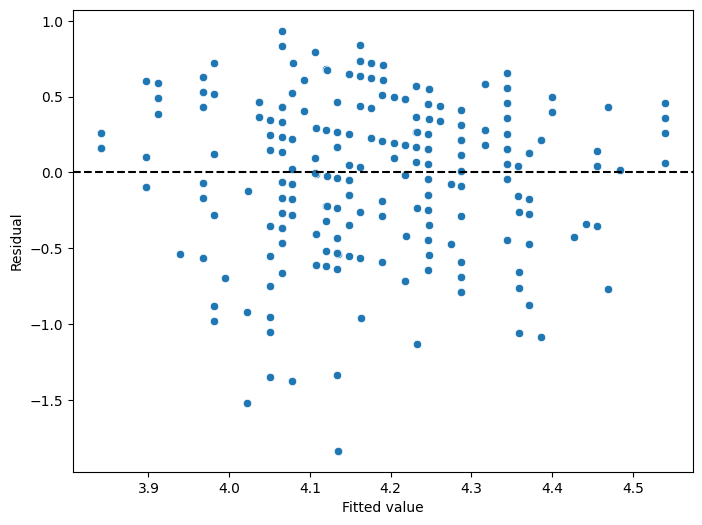

In [34]:
# Inspect the residuals.
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(
    x=results.fittedvalues,
    y=results.resid
)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     8.736
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           1.65e-05
Time:                        22:06:00   Log-Likelihood:                -169.18
No. Observations:                 231   AIC:                             346.4
Df Residuals:                     227   BIC:                             360.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          3.9908      0.158     25.

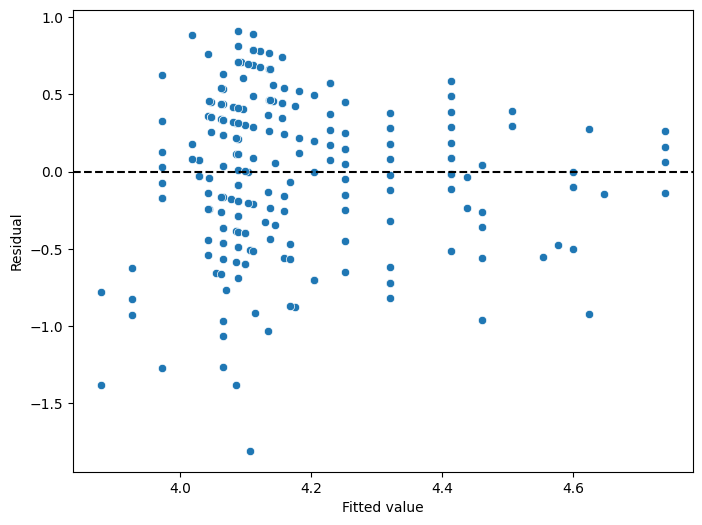

In [35]:
# Next we investigate the interaction effect of both predictors. Do increases in beauty score raise evaluations more for women than for men (or vice versa)?
#This is what’s called an interaction effect.

design = MS(["bty_avg", "gender", ("bty_avg", "gender")])
X_train_design = design.fit_transform(X_train)
model = sm.OLS(y_train, X_train_design)
results = model.fit()
print(results.summary())

# Inspect the residuals.
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(
    x=results.fittedvalues,
    y=results.resid
)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")
plt.show()

After accounting for gender, beauty interacts with gender in predicting teaching evaluations.

For female instructors, beauty has little to no effect on evaluation scores.

For male instructors, higher beauty scores are associated with significantly higher teaching evaluations.

The interaction between beauty and gender is statistically significant (p = 0.008), indicating that the influence of physical attractiveness differs by gender.

Overall, the model explains about 10% of the variation in teaching evaluations — modest but meaningful in social science data.

In [38]:
# Evaluating the performance of the three models - with bty_avg, with bty_avg and gender, with bty_avg and gender and their interaction terms.

#model1: only bty_avg
design = MS(['bty_avg'])
X_train_design = design.fit_transform(X_train)
model = sm.OLS(y_train, X_train_design)
results = model.fit()

X_test_design = design.fit_transform(X_test)
y_test_pred = results.get_prediction(X_test_design).predicted_mean

rmse_test_1 = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

# Model 2: only bty_avg and gender.
design = MS(["bty_avg", "gender"])
X_train_design = design.fit_transform(X_train)
model = sm.OLS(y_train, X_train_design)
results = model.fit()

X_test_design = design.fit_transform(X_test)
y_test_pred = results.get_prediction(X_test_design).predicted_mean

rmse_test_2 = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

# Model 3: bty_avg and gender with their interaction effect.
design = MS(["bty_avg", "gender", ("bty_avg", "gender")])
X_train_design = design.fit_transform(X_train)
model = sm.OLS(y_train, X_train_design)
results = model.fit()

X_test_design = design.fit_transform(X_test)
y_test_pred = results.get_prediction(X_test_design).predicted_mean

rmse_test_3 = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

print(f"Test RMSE for Model 1: {rmse_test_1}")
print(f"Test RMSE for Model 2: {rmse_test_2}")
print(f"Test RMSE for Model 3: {rmse_test_3}")


Test RMSE for Model 1: 0.548539597522517
Test RMSE for Model 2: 0.5426501097403674
Test RMSE for Model 3: 0.5450672216592892


The second model performs the best. 